<a href="https://colab.research.google.com/github/MiinJng/Test_ML/blob/main/4%EB%8B%A8%EC%9B%90_%EC%B6%94%EA%B0%80%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 준비

In [1]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')

iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 2. 클래스 추출

In [2]:
print(pd.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


# 3. 입력 데이터와 정답 데이터 생성

In [3]:
iris_input = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
iris_target = iris['Species'].to_numpy()

# 4. 훈련 세트와 테스트 세트로 나누기

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, stratify=iris_target, random_state=42)
print(train_input.shape, test_input.shape)

(112, 4) (38, 4)


# 5. 데이터 표준화

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 6. 테스트 세트의 5개의 데이터에 대해서 예측과 확률을 알아보기

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_scaled, train_target)
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


# 7. 최적화하기

In [19]:
score_train=[]
score_test=[]

for i in range(2,16):
  kne = KNeighborsClassifier(n_neighbors=1)
  kne.fit(train_scaled, train_target)
  score_train.append(kne.score(train_scaled, train_target))
  score_test.append(kne.score(test_scaled, test_target))


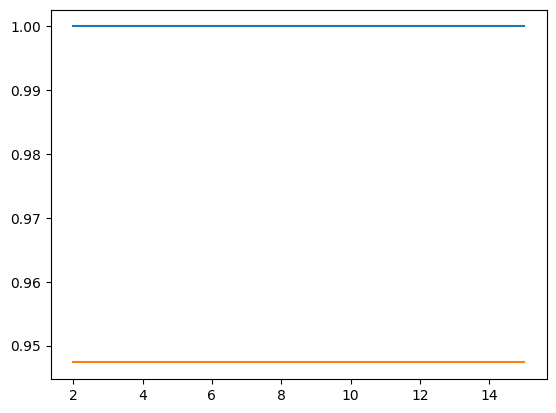

In [20]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(2,16,1)
plt.plot(x, score_train)
plt.plot(x, score_test)

# 8. 로지스틱 회귀 -> 다중 분류 훈련 및 최적화

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9821428571428571
0.9473684210526315


In [22]:
print(lr.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [23]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [24]:
print(lr.classes_)

['setosa' 'versicolor' 'virginica']


In [25]:
print(lr.coef_.shape, lr.intercept_.shape)

(3, 4) (3,)


In [26]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ 14.49   7.22 -21.71]
 [ -2.88   2.82   0.06]
 [ -1.46   3.99  -2.52]
 [ -3.4    4.44  -1.04]
 [ 13.45   7.44 -20.9 ]]


In [27]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


# 9. 확률적 경사 하강법 -> 다중 분류 훈련 및 최적화

In [34]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.8947368421052632


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [35]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9375
0.9210526315789473


In [36]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [37]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


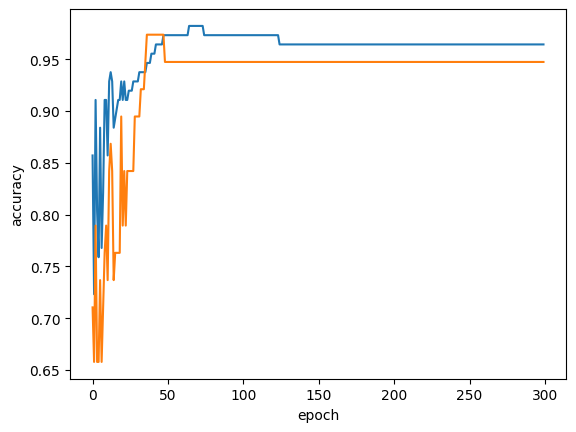

In [39]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [40]:
sc = SGDClassifier(loss='log', max_iter=130, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
